In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix



In [11]:

data = {
    "review": [
        "I love this product",
        "This is an amazing movie",
        "I am very happy with the service",
        "This is the worst experience",
        "I hate this item",
        "Very bad quality",
        "Excellent performance",
        "Not good at all"
    ],
    "sentiment": [
        "positive", "positive", "positive",
        "negative", "negative", "negative",
        "positive", "negative"
    ]
}

df = pd.DataFrame(data)



In [12]:

X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [13]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [14]:

model = MultinomialNB()
model.fit(X_train_vec, y_train)



MultinomialNB()

In [15]:
y_pred = model.predict(X_test_vec)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0


In [17]:

cm = confusion_matrix(y_test, y_pred)



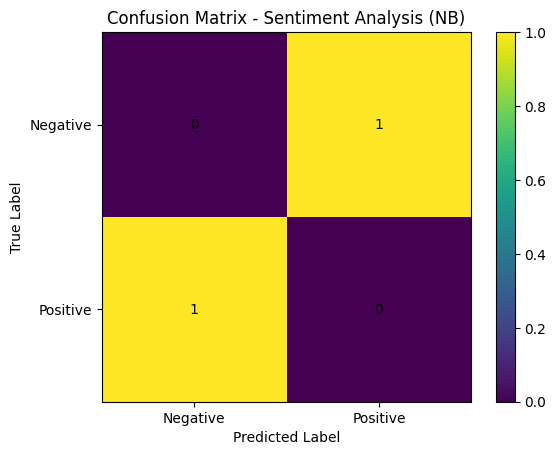

In [18]:

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Sentiment Analysis (NB)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.yticks([0, 1], ["Negative", "Positive"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i][j], ha="center", va="center")

plt.colorbar()
plt.show()
